In [1]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
from scipy.stats import chi2

In [2]:
def get_covariance(sigma1, sigma2, phi):
    s = np.sin(phi)
    c = np.cos(phi)
    U = np.array([
        [c, -s],
        [s, c],
    ])
    S = np.diag([sigma1, sigma2])
    R = U @ S**2 @ U.T
    return R

In [3]:
def sample_cov(X):
    X_n = X - X.mean(0)
    return (X_n.T @ X_n) / X.shape[0]

In [4]:
def get_covariance_ellipse(cov, mean=np.zeros(2), ndiv=100, confidence=0.95):
    assert cov.shape == (2, 2)
    NDIM = 2
    t = np.linspace(0.0, 2*np.pi, ndiv)
    a = np.column_stack([np.sin(t), np.cos(t)])

    c_sqr = chi2.ppf(confidence, NDIM)
    c = np.sqrt(c_sqr)
    s_sqr, U = la.eig(cov)
    cov_ellipse = c * a @ np.diag(np.sqrt(s_sqr)) @ U.T + mean
    return cov_ellipse

In [5]:
x = np.array([1., 2.])

In [18]:
R1 = get_covariance(1.0, 1.3, 0.2)

R2 = get_covariance(2.0, 1.5, 0.9)

R3 = get_covariance(0.9, 2.5, 1.5)

iR1 = la.inv(R1)
iR2 = la.inv(R2)
iR3 = la.inv(R3)

R = la.inv(iR1 + iR2 + iR3)

In [19]:
y1 = np.random.multivariate_normal(mean=x, cov=R1, size=1000)
y2 = np.random.multivariate_normal(mean=x, cov=R2, size=1000)
y3 = np.random.multivariate_normal(mean=x, cov=R3, size=1000)

In [20]:
x_hat = (y1 @ iR1.T + y2 @ iR2.T + y3 @ iR3.T) @ R.T

In [21]:
sample_cov(x_hat)

array([[ 0.65241599, -0.0197644 ],
       [-0.0197644 ,  0.47872831]])

In [22]:
R

array([[ 0.65925107, -0.01848897],
       [-0.01848897,  0.46302008]])

(-3.0, 7.0)

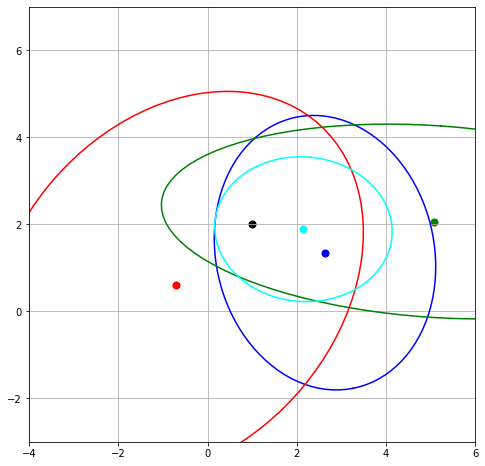

In [24]:
plt.figure(figsize=(8,8))
plt.scatter(x[0], x[1], s=50, c="k")

# plt.scatter(y1[:,0], y1[:,1], s=0.5, c="b")
# plt.scatter(y2[:,0], y2[:,1], s=0.5, c="red")
# plt.scatter(y3[:,0], y3[:,1], s=0.5, c="green")

plt.grid()

i = 0
y1_ell = get_covariance_ellipse(R1, mean=y1[i])
y2_ell = get_covariance_ellipse(R2, mean=y2[i])
y3_ell = get_covariance_ellipse(R3, mean=y3[i])
x_ell = get_covariance_ellipse(R, mean=x_hat[i])

plt.scatter(y1[i,0], y1[i,1], s=50, c="b")
plt.scatter(y2[i,0], y2[i,1], s=50, c="red")
plt.scatter(y3[i,0], y3[i,1], s=50, c="green")
plt.scatter(x_hat[i, 0], x_hat[i, 1], s=50, c="cyan")

plt.plot(y1_ell[:,0], y1_ell[:,1], c="b")
plt.plot(y2_ell[:,0], y2_ell[:,1], c="red")
plt.plot(y3_ell[:,0], y3_ell[:,1], c="green")
plt.plot(x_ell[:,0], x_ell[:,1], c="cyan")

a = 10
plt.xlim(x[0] - a/2, x[0] + a/2)
plt.ylim(x[1] - a/2, x[1] + a/2)